In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("../data/Chapter2OnlineData.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('-','_')
df.columns = df.columns.str.replace(',','')
df.columns = df.columns.str.lower()
df.head(5)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_by_country_year,standard_deviation/mean_of_ladder_by_country_year,gini_index_(world_bank_estimate),gini_index_(world_bank_estimate)_average_2000_16,gini_of_household_income_reported_in_gallup_by_wp5_year,most_people_can_be_trusted_gallup,most_people_can_be_trusted_wvs_round_1981_1984,most_people_can_be_trusted_wvs_round_1989_1993,most_people_can_be_trusted_wvs_round_1994_1998,most_people_can_be_trusted_wvs_round_1999_2004,most_people_can_be_trusted_wvs_round_2005_2009,most_people_can_be_trusted_wvs_round_2010_2014
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'confidence_in_national_government', 'democratic_quality',
       'delivery_quality', 'standard_deviation_of_ladder_by_country_year',
       'standard_deviation/mean_of_ladder_by_country_year',
       'gini_index_(world_bank_estimate)',
       'gini_index_(world_bank_estimate)_average_2000_16',
       'gini_of_household_income_reported_in_gallup_by_wp5_year',
       'most_people_can_be_trusted_gallup',
       'most_people_can_be_trusted_wvs_round_1981_1984',
       'most_people_can_be_trusted_wvs_round_1989_1993',
       'most_people_can_be_trusted_wvs_round_1994_1998',
       'most_people_can_be_trusted_wvs_round_1999_2004',
       'most_people_can_be_trusted_wvs_round_2005_2009',
       'most_people_can_be_trusted_wvs_round_2

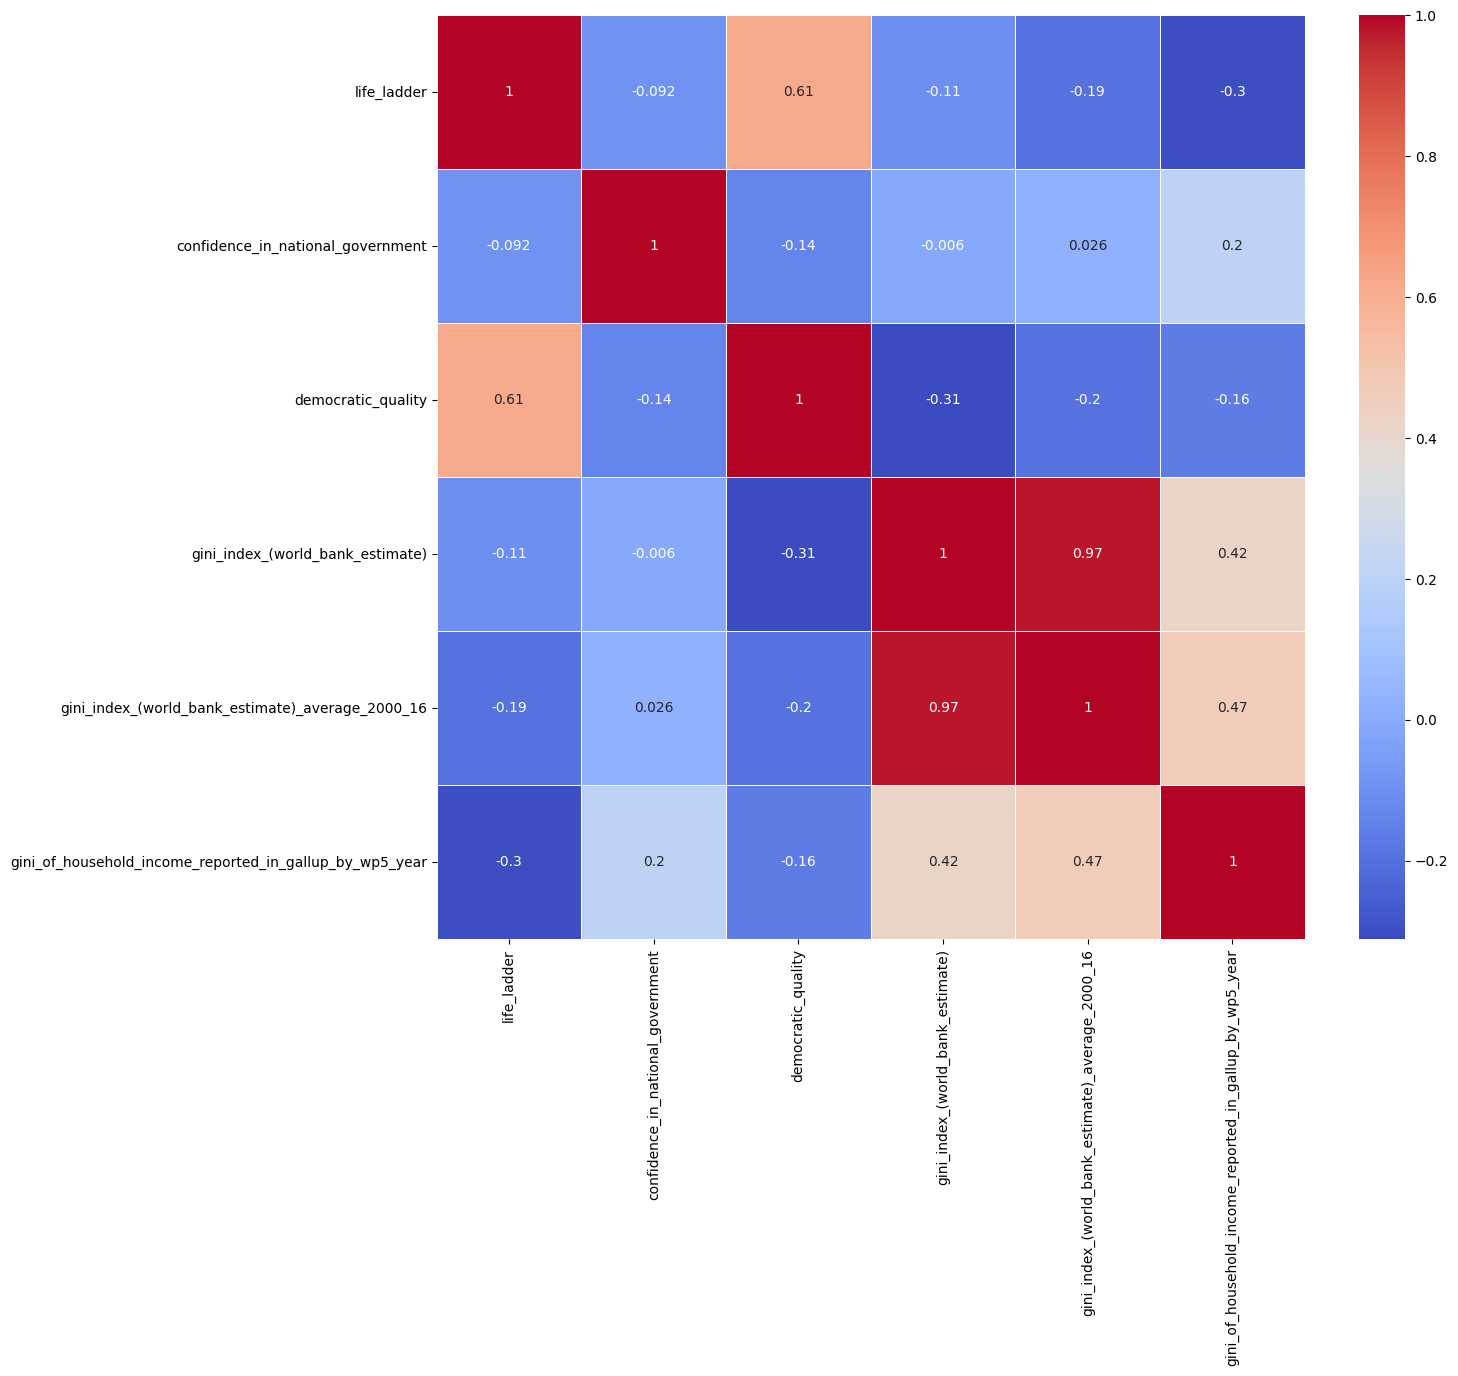

In [4]:
corr_columns=['life_ladder', 'confidence_in_national_government',
              'democratic_quality',
              'gini_index_(world_bank_estimate)',
              'gini_index_(world_bank_estimate)_average_2000_16',
              'gini_of_household_income_reported_in_gallup_by_wp5_year']
plt.figure(figsize = (14,12))
ax = sns.heatmap(df[corr_columns].corr(),
                 linewidths=.5, annot=True, cmap='coolwarm')

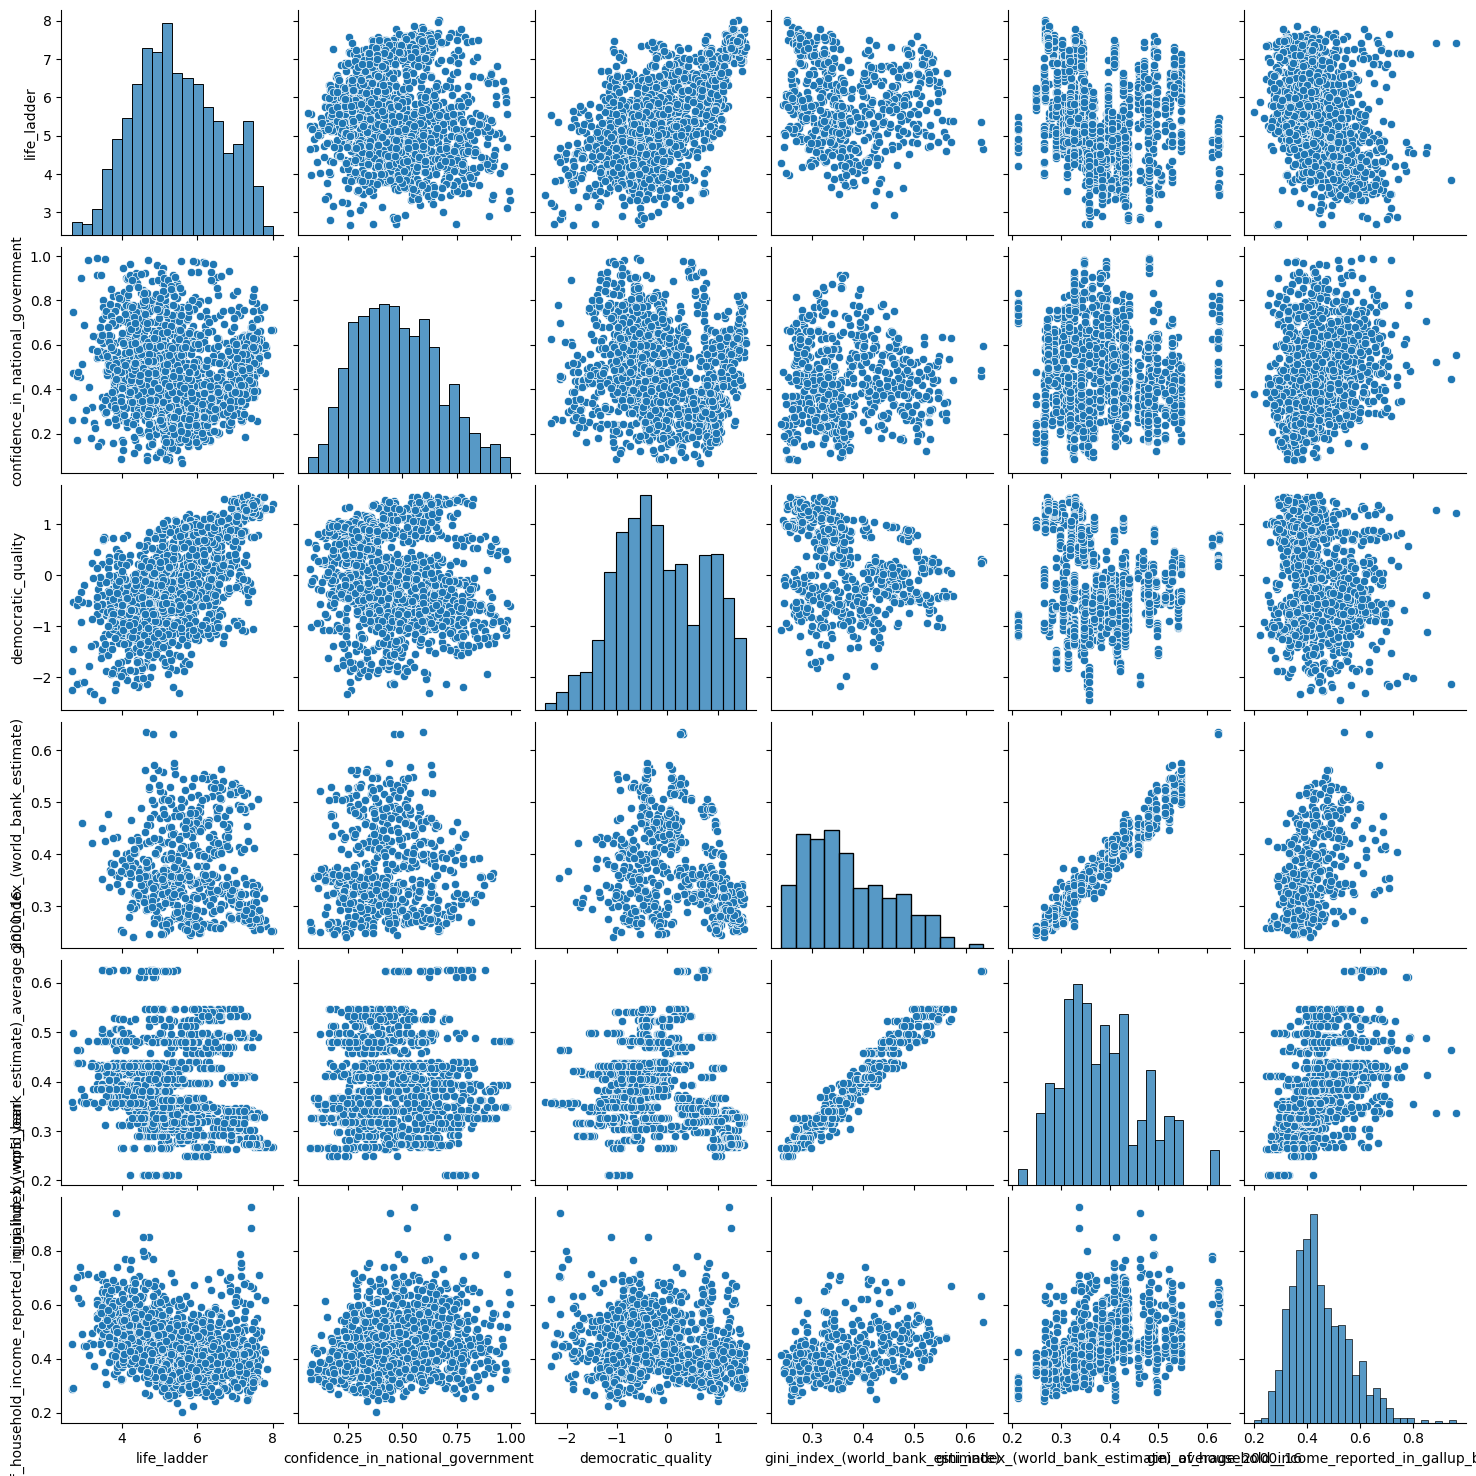

In [5]:
# Plot pair plot of potential features
sns.pairplot(df[corr_columns]);

In [6]:
country_names_lst = df.country_name.unique().tolist()
len(country_names_lst)

165

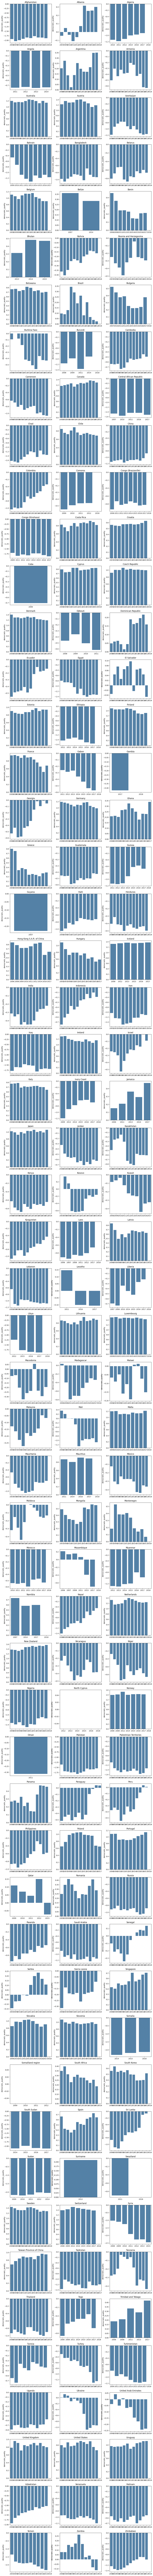

In [10]:
fig,axes = plt.subplots(55,3, figsize =(15,275))
count = 0
for item in country_names_lst:
    sns.barplot(data = df[df['country_name'] == item],
                 x = 'year', y = 'democratic_quality', 
                 ax=axes[int(count/3)][count%3], color='steelblue').set(title=item, xlabel='')
    count += 1